<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@400;700&family=Playfair+Display&display=swap" rel="stylesheet">

<p style="background-color:#1F4E79; font-family:'Playfair Display', 'Georgia', serif; color:white; font-size:32px; text-align:center; border-radius:15px 50px; padding:14px;">
  Capstone Project | Credit Card Usage Segmentation
</p>


<div style="border-radius:10px; padding: 15px; background-color: #5DADE2; font-size:120%; text-align:left">

<h3 align="left"><font color=#2C3E50>Problem Statement:</font></h3>

A financial institution possesses a rich dataset summarizing the credit card usage patterns of thousands of customers over a period of time. However, the organization currently relies on traditional, largely manual techniques for customer segmentation, which results in missed opportunities for targeted marketing, optimal credit risk management, and fraud prevention.

<div style="border-radius:10px; padding: 15px; background-color: #5DADE2; font-size:120%; text-align:left">

<h3 align="left"><font color=#2C3E50>Objective:</font></h3>

The objective of this project is to apply unsupervised machine learning techniques to automatically identify distinct segments among credit card users based on their behavioral and financial usage data. By uncovering natural groupings in the dataset, the project aims to:

Reveal actionable customer segments to enable personalized product offerings and services,

Enhance credit risk assessment by linking usage patterns to potential risk profiles,

Guide marketing strategies for improved customer acquisition, engagement, and retention

<a id="contents_tabel"></a>    
<div style="border-radius:10px; padding: 15px; background-color: #5DADE2; font-size:115%; text-align:left">

<h3 align="left"><font color=red>Table of Contents:</font></h3>
    
* [Step 1 | Import Libraries](#import)
* [Step 2 | Read Dataset](#read)
* [Step 3 | Dataset Overview](#overview)
    - [Step 3.1 | Dataset Basic Information](#basic)
    - [Step 3.2 | Summary Statistics for Numerical Variables](#num_statistics)
    - [Step 3.3 | Summary Statistics for Categorical Variables](#cat_statistics)
* [Step 4 | EDA](#eda)
    - [Step 4.1 | Univariate Analysis](#univariate)
        - [Step 4.1.1 | Numerical Variables Univariate Analysis](#num_uni)
        - [Step 4.1.2 | Categorical Variables Univariate Analysis](#cat_uni)
    - [Step 4.2 | Bivariate Analysis](#bivariate)
        - [Step 4.2.1 | Numerical Features vs Target](#num_target)
        - [Step 4.2.2 | Categorical Features vs Target](#cat_target)
* [Step 5 | Data Preprocessing](#preprocessing)
    - [Step 5.1 | Irrelevant Features Removal](#feature_removal)
    - [Step 5.2 | Missing Value Treatment](#missing)
    - [Step 5.3 | Outlier Treatment](#outlier)
    - [Step 5.4 | Categorical Features Encoding](#encoding)
    - [Step 5.5 | Feature Scaling](#scaling)
    - [Step 5.6 | Transforming Skewed Features](#transform)
* [Step 6 | Decision Tree Model Building](#dt)
    - [Step 6.1 | DT Base Model Definition](#dt_base)
    - [Step 6.2 | DT Hyperparameter Tuning](#dt_hp)
    - [Step 6.3 | DT Model Evaluation](#dt_eval)
* [Step 7 | Random Forest Model Building](#rf)
    - [Step 7.1 | RF Base Model Definition](#rf_base)
    - [Step 7.2 | RF Hyperparameter Tuning](#rf_hp)
    - [Step 7.3 | RF Model Evaluation](#rf_eval)
* [Step 8 | Logistic Regression Model Building](#logistic)
    - [Step 8.1 | Logistic Base Model Definition](#logistic_base)
    - [Step 8.2 | Logistic Hyperparameter Tuning](#logistic_hp)
    - [Step 8.3 | Logistic Model Evaluation](#logistic_eval)
* [Step 9 | SVM Model Building](#svm)
    - [Step 9.1 | SVM Base Model Definition](#svm_base)
    - [Step 9.2 | SVM Hyperparameter Tuning](#svm_hp)
    - [Step 9.3 | SVM Model Evaluation](#svm_eval)
* [Step 10 | Conclusion](#conclusion)
* [Step 11 | Prediction](#prediction)

<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@400;700&family=Playfair+Display&display=swap" rel="stylesheet">

<p style="background-color:#1F4E79; font-family:'Playfair Display', 'Georgia', serif; color:white; font-size:32px; text-align:center; border-radius:15px 50px; padding:14px;">
  Step 1 | Import Libraries
</p>


In [2]:
# Install required libraries (run in terminal/command prompt)
### pip install pandas numpy matplotlib seaborn scikit-learn scipy

# Import libraries in your Python script
import pandas as pd                    # Data manipulation
import numpy as np                     # Numerical operations
import matplotlib.pyplot as plt        # Basic plotting
import seaborn as sns                  # Statistical visualizations
import warnings
warnings.filterwarnings('ignore')      # Suppress warnings for cleaner output

# Import preprocessing tools
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer

# Import dimensionality reduction tools
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Import clustering algorithms
from sklearn.cluster import KMeans, AgglomerativeClustering

# Import evaluation metrics
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

# Import hierarchical clustering utilities
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import cdist


<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@400;700&family=Playfair+Display&display=swap" rel="stylesheet">

<p style="background-color:#1F4E79; font-family:'Playfair Display', 'Georgia', serif; color:white; font-size:32px; text-align:center; border-radius:15px 50px; padding:14px;">
  Step 2 | Data Collection and Loading
</p>

In [3]:
# Load your dataset
df = pd.read_csv('D:\BIA\CREDIT_CARD_USAGE_SEGMENTATION\Customer Data.csv')
df



CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365  

<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@400;700&family=Playfair+Display&display=swap" rel="stylesheet">

<p style="background-color:#1F4E79; font-family:'Playfair Display', 'Georgia', serif; color:white; font-size:32px; text-align:center; border-radius:15px 50px; padding:14px;">
  Step 3 | Dataset Overview
</p>

<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@400;700&family=Playfair+Display&display=swap" rel="stylesheet">

<p style="background-color:#AED6F1; font-family:'Playfair Display', 'Georgia', serif; color:white; font-size:26px; text-align:center; border-radius:15px 50px; padding:14px;">
  3.1 Dataset Basic Information
</p>

In [4]:
# Display basic information
print(f"Dataset Shape: {df.shape}")
print(f"Number of Customers: {df.shape[0]}")
print(f"Number of Features: {df.shape[1]}")
print("\nFirst 5 rows:")
print(df.head())

Dataset Shape: (8950, 18)
Number of Customers: 8950
Number of Features: 18

First 5 rows:
  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0            

<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@400;700&family=Playfair+Display&display=swap" rel="stylesheet">
<div style="background-color:#AED6F1; font-family:'Playfair Display', 'Georgia', serif; color:white; font-size:16px; text-align:center; border-radius:15px 50px; padding:14px;">

<h2 align="left"><font color=red>Inferences:</font></h2>

* __Number of Entries__: The dataset consists of 8,950 entries, ranging from index 0 to 8,949.
    
* __Columns__: There are 18 columns in the dataset corresponding to various attributes of each credit card customer’s usage and profile.
    
    
* __Data Types__:
    -  Most columns are of the float64 data type, as they record numerical features like balances, payments, credit limits, and usage frequencies.
    -  Some columns, such as transaction counts (CASH_ADVANCE_TRX, PURCHASES_TRX, TENURE), may be integers (int64), and customer IDs (CUST_ID) are typically string or object.
    
* __Missing Values__: Some entries (such as MINIMUM_PAYMENTS) contain missing (NaN) values, but the majority of columns have nearly complete data
</p>

<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@400;700&family=Playfair+Display&display=swap" rel="stylesheet">

<p style="background-color:#AED6F1; font-family:'Playfair Display', 'Georgia', serif; color:white; font-size:26px; text-align:center; border-radius:15px 50px; padding:14px;">
  3.2 Summary Statistics for Numerical Variables
</p>

In [5]:
df.describe().T

count         mean          std        min  \
BALANCE                           8950.0  1564.474828  2081.531879   0.000000   
BALANCE_FREQUENCY                 8950.0     0.877271     0.236904   0.000000   
PURCHASES                         8950.0  1003.204834  2136.634782   0.000000   
ONEOFF_PURCHASES                  8950.0   592.437371  1659.887917   0.000000   
INSTALLMENTS_PURCHASES            8950.0   411.067645   904.338115   0.000000   
CASH_ADVANCE                      8950.0   978.871112  2097.163877   0.000000   
PURCHASES_FREQUENCY               8950.0     0.490351     0.401371   0.000000   
ONEOFF_PURCHASES_FREQUENCY        8950.0     0.202458     0.298336   0.000000   
PURCHASES_INSTALLMENTS_FREQUENCY  8950.0     0.364437     0.397448   0.000000   
CASH_ADVANCE_FREQUENCY            8950.0     0.135144     0.200121   0.000000   
CASH_ADVANCE_TRX                  8950.0     3.248827     6.824647   0.000000   
PURCHASES_TRX                     8950.0    14.709832    24.857649   0.000000   
CREDIT_LIMIT                      8949.0  4494.449450  3638.815725  50.000000   
PAYMENTS                          8950.0  1733.143852  2895.063757   0.000000   
MINIMUM_PAYMENTS                  8637.0   864.206542  2372.446607   0.019163   
PRC_FULL_PAYMENT                  8950.0     0.153715     0.292499   0.000000   
TENURE                            8950.0    11.517318     1.338331   6.000000   

                                          25%          50%          75%  \
BALANCE                            128.281915   873.385231  2054.140036   
BALANCE_FREQUENCY                    0.888889     1.000000     1.000000   
PURCHASES                           39.635000   361.280000  1110.130000   
ONEOFF_PURCHASES                     0.000000    38.000000   577.405000   
INSTALLMENTS_PURCHASES               0.000000    89.000000   468.637500   
CASH_ADVANCE                         0.000000     0.000000  1113.821139   
PURCHASES_FREQUENCY                  0.083333     0.500000     0.916667   
ONEOFF_PURCHASES_FREQUENCY           0.000000     0.083333     0.300000   
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000     0.166667     0.750000   
CASH_ADVANCE_FREQUENCY               0.000000     0.000000     0.222222   
CASH_ADVANCE_TRX                     0.000000     0.000000     4.000000   
PURCHASES_TRX                        1.000000     7.000000    17.000000   
CREDIT_LIMIT                      1600.000000  3000.000000  6500.000000   
PAYMENTS                           383.276166   856.901546  1901.134317   
MINIMUM_PAYMENTS                   169.123707   312.343947   825.485459   
PRC_FULL_PAYMENT                     0.000000     0.000000     0.142857   
TENURE                              12.000000    12.000000    12.000000   

                                          max  
BALANCE                           19043.13856  
BALANCE_FREQUENCY                     1.00000  
PURCHASES                         49039.57000  
ONEOFF_PURCHASES                  40761.25000  
INSTALLMENTS_PURCHASES            22500.00000  
CASH_ADVANCE                      47137.21176  
PURCHASES_FREQUENCY                   1.00000  
ONEOFF_PURCHASES_FREQUENCY            1.00000  
PURCHASES_INSTALLMENTS_FREQUENCY      1.00000  
CASH_ADVANCE_FREQUENCY                1.50000  
CASH_ADVANCE_TRX                    123.00000  
PURCHASES_TRX                       358.00000  
CREDIT_LIMIT                      30000.00000  
PAYMENTS                          50721.48336  
MINIMUM_PAYMENTS                  76406.20752  
PRC_FULL_PAYMENT                      1.00000  
TENURE                               12.00000

<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@400;700&family=Playfair+Display&display=swap" rel="stylesheet">

<p style="background-color:#AED6F1; font-family:'Playfair Display', 'Georgia', serif; color:white; font-size:26px; text-align:center; border-radius:15px 50px; padding:14px;">
  3.3 Summary Statistics for Categorical  Variables
</p>

In [6]:
# Get the summary statistics for categorical variables
df.describe(include='object')

CUST_ID
count     8950
unique    8950
top     C10001
freq         1

<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@400;700&family=Playfair+Display&display=swap" rel="stylesheet">

<p style="background-color:#1F4E79; font-family:'Playfair Display', 'Georgia', serif; color:white; font-size:32px; text-align:center; border-radius:15px 50px; padding:14px;">
  Step 4 | Exploratory Data Analysis (EDA)
</p>


<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@400;700&family=Playfair+Display&display=swap" rel="stylesheet">

<p style="background-color:#AED6F1; font-family:'Playfair Display', 'Georgia', serif; color:white; font-size:26px; text-align:center; border-radius:15px 50px; padding:14px;">
  4.1 Statistical Summary
</p>

In [7]:
# Get statistical summary of numerical features
print("Statistical Summary:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing_data,
    'Percentage': missing_percentage
})
print(missing_df[missing_df['Missing_Count'] > 0])

# Check for duplicate records
print(f"\nDuplicate Records: {df.duplicated().sum()}")

Statistical Summary:
            BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000

<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@400;700&family=Playfair+Display&display=swap" rel="stylesheet">

<p style="background-color:#AED6F1; font-family:'Playfair Display', 'Georgia', serif; color:white; font-size:26px; text-align:center; border-radius:15px 50px; padding:14px;">
  4.2 Distribution Analysis
</p>

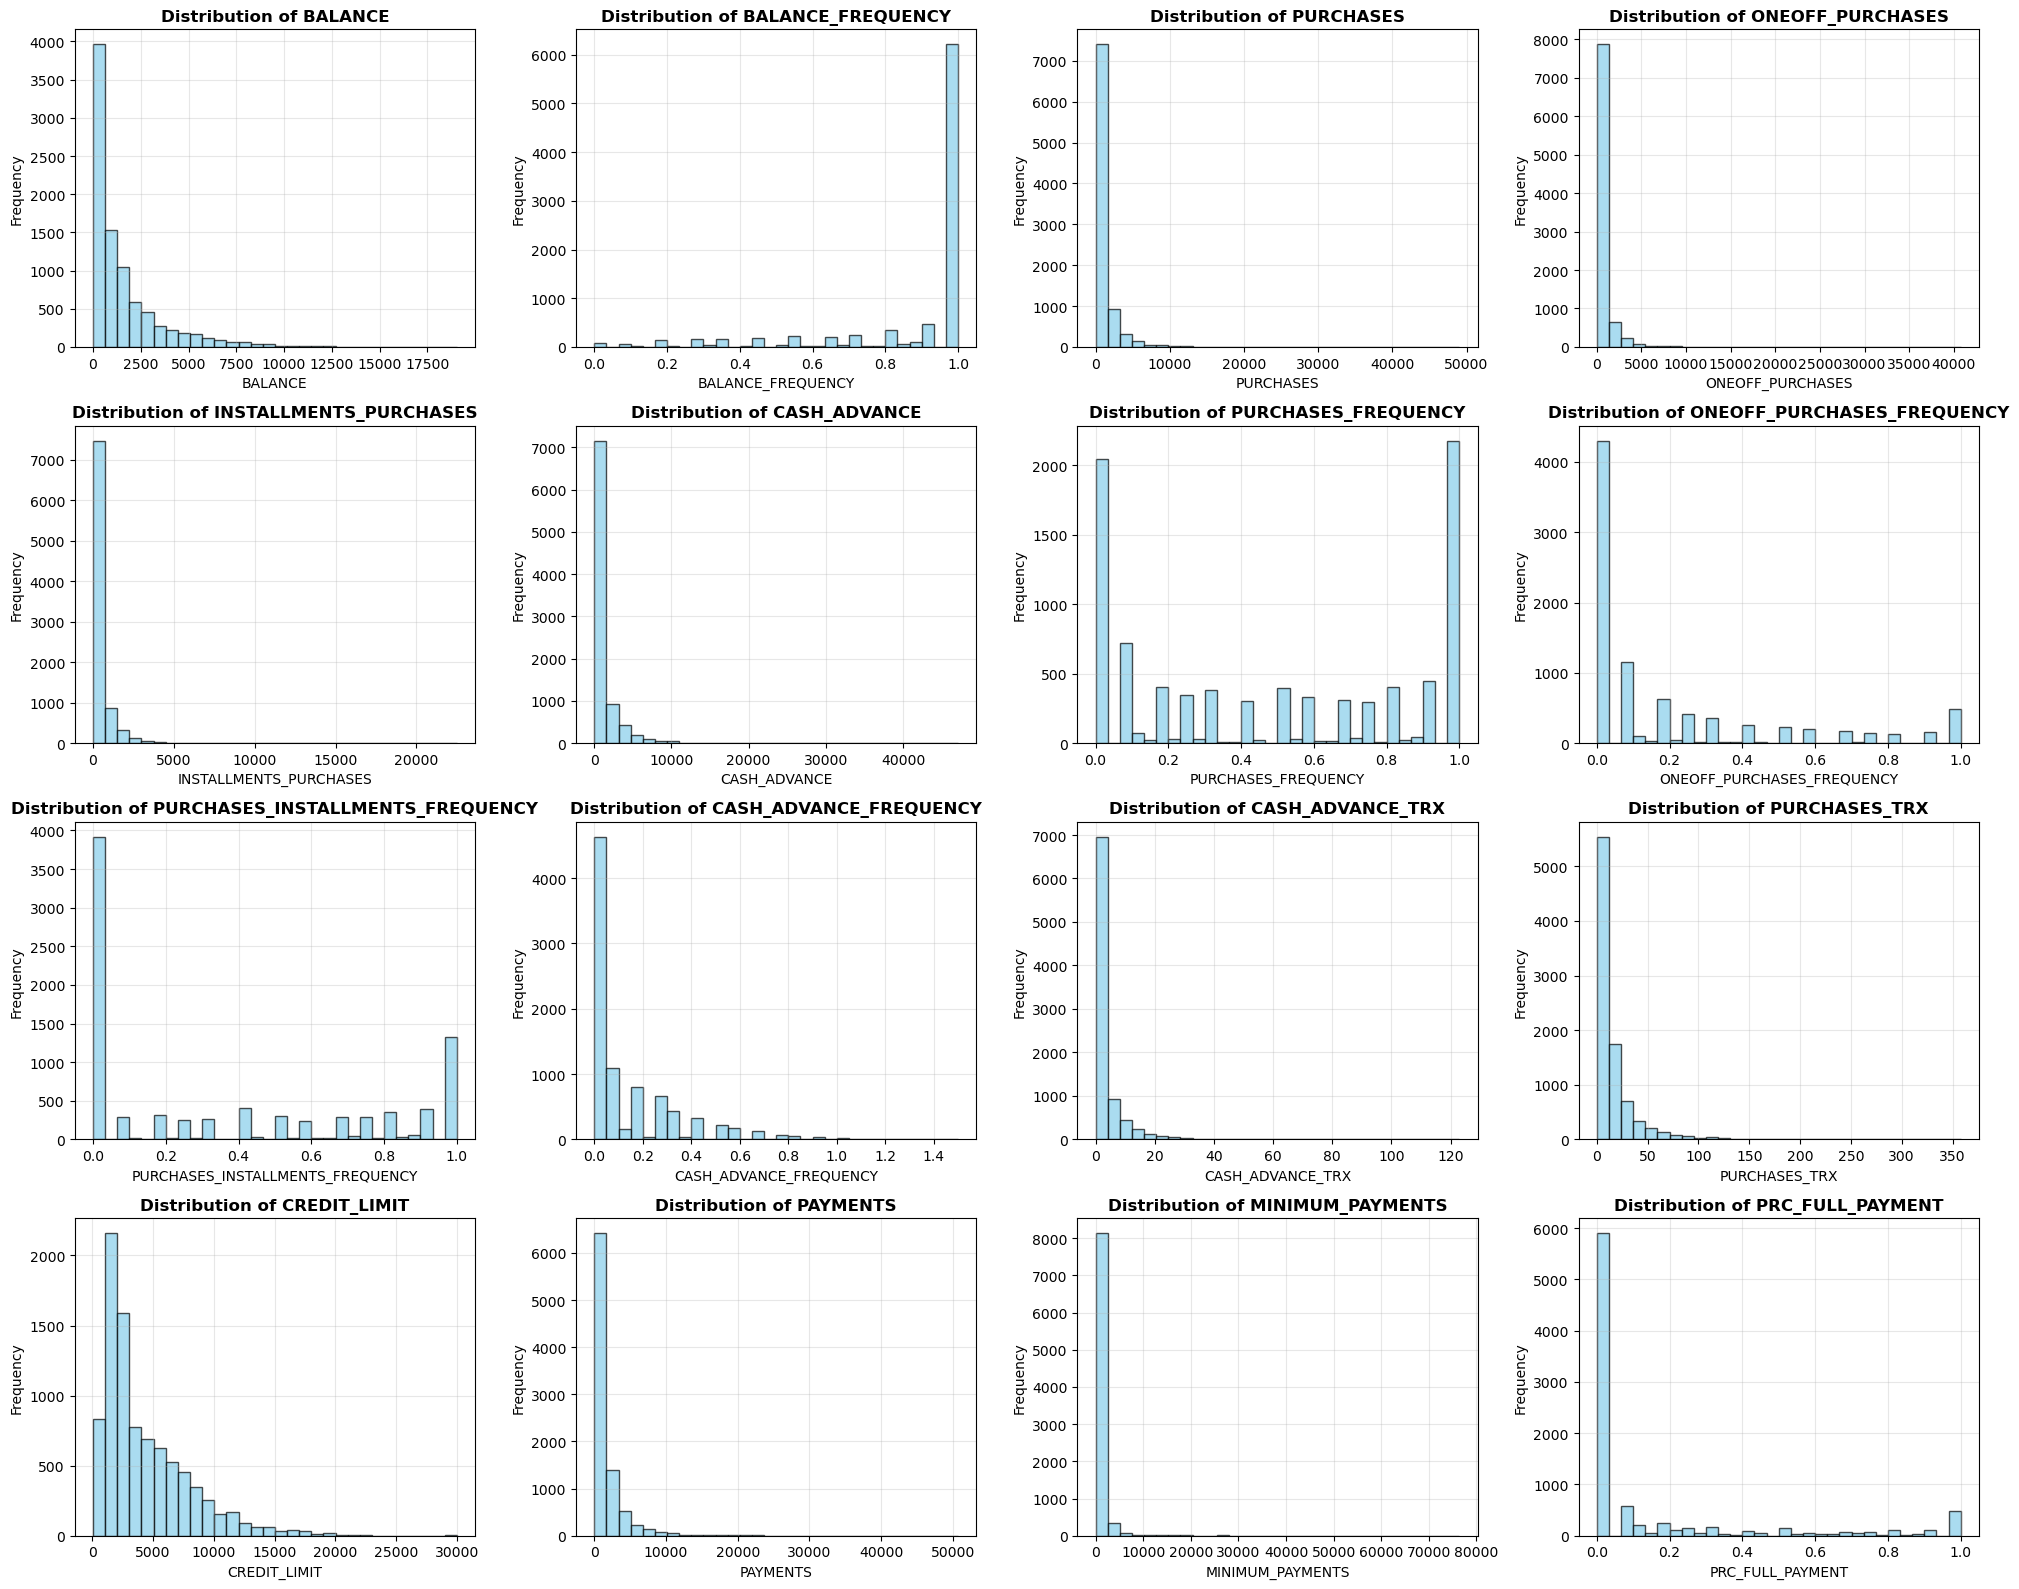

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('D:\BIA\CREDIT_CARD_USAGE_SEGMENTATION\Customer Data.csv')

# Ensure the save path exists
os.makedirs('reports/figures', exist_ok=True)

numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'CUST_ID' in numerical_cols:
    numerical_cols.remove('CUST_ID')

fig, axes = plt.subplots(4, 4, figsize=(20, 16))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols[:16]):
    axes[idx].hist(df[col].dropna(), bins=30, edgecolor='black', alpha=0.7, color='skyblue')
    axes[idx].set_title(f'Distribution of {col}', fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('reports/figures/feature_distributions.png', dpi=300)
plt.show()


<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@400;700&family=Playfair+Display&display=swap" rel="stylesheet">

<p style="background-color:#AED6F1; font-family:'Playfair Display', 'Georgia', serif; color:white; font-size:26px; text-align:center; border-radius:15px 50px; padding:14px;">
  4.3 Correlation Analysis
</p>

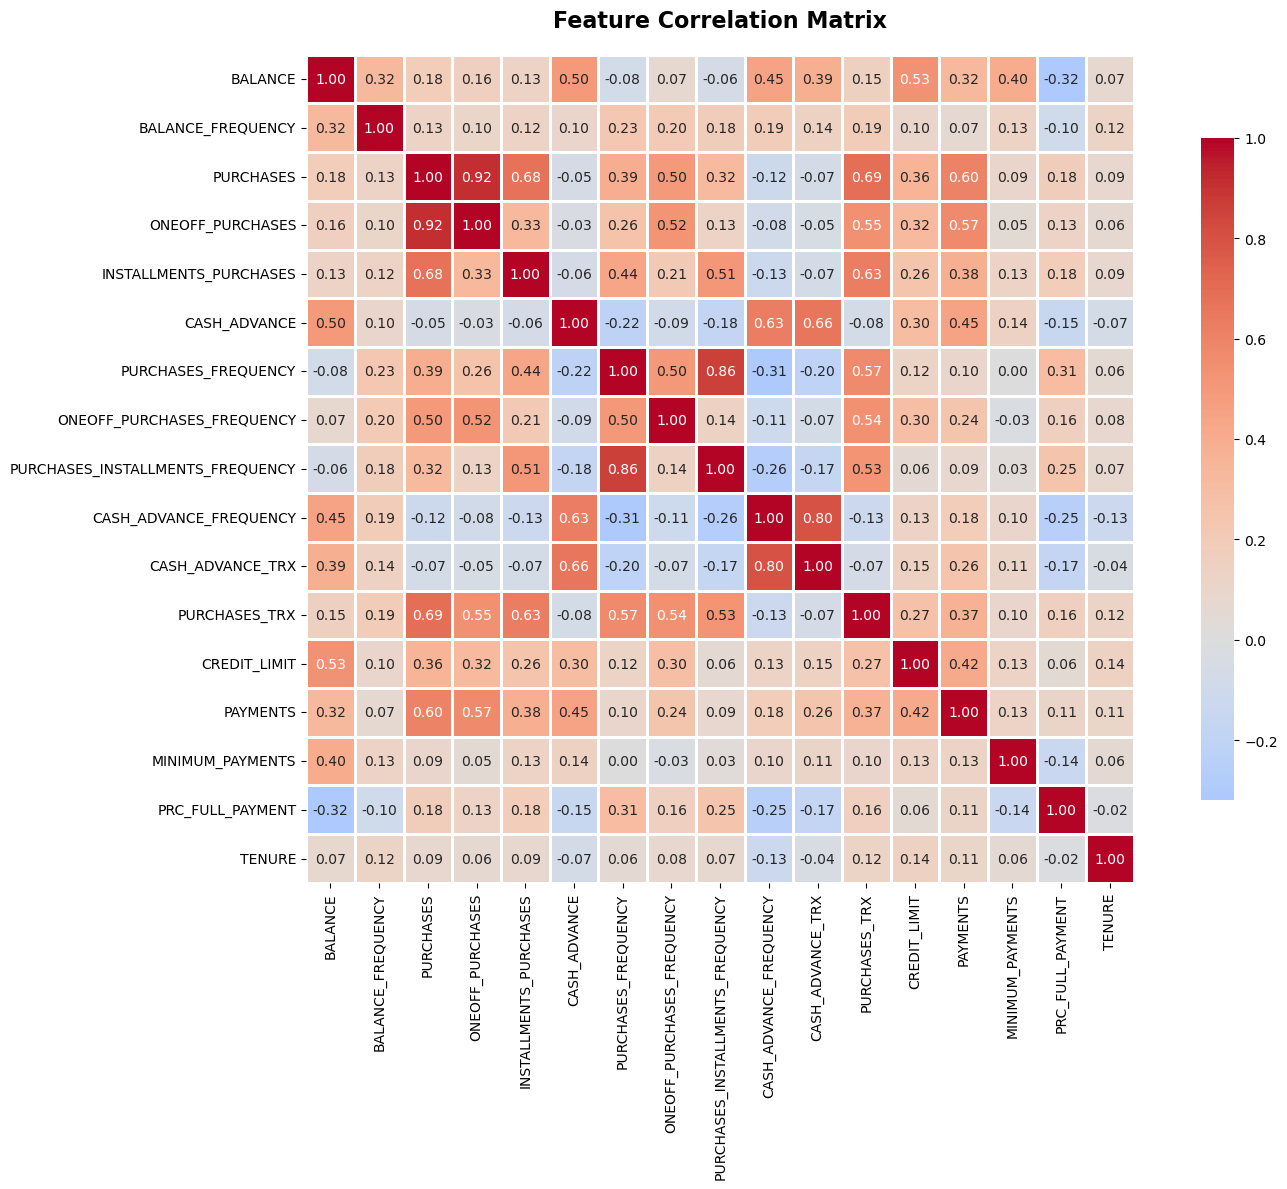

In [9]:
# Create correlation heatmap
plt.figure(figsize=(16, 12))
correlation_matrix = df[numerical_cols].corr()

sns.heatmap(correlation_matrix, 
            annot=True,           # Show correlation values
            fmt='.2f',            # Format to 2 decimal places
            cmap='coolwarm',      # Color scheme
            center=0,             # Center colormap at 0
            square=True,          # Make cells square-shaped
            linewidths=1,         # Add gridlines
            cbar_kws={"shrink": 0.8})

plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('reports/figures/correlation_heatmap.png', dpi=300)
plt.show()



<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@400;700&family=Playfair+Display&display=swap" rel="stylesheet">

<p style="background-color:#AED6F1; font-family:'Playfair Display', 'Georgia', serif; color:white; font-size:26px; text-align:center; border-radius:15px 50px; padding:14px;">
  4.4 Outlier Detection
</p>

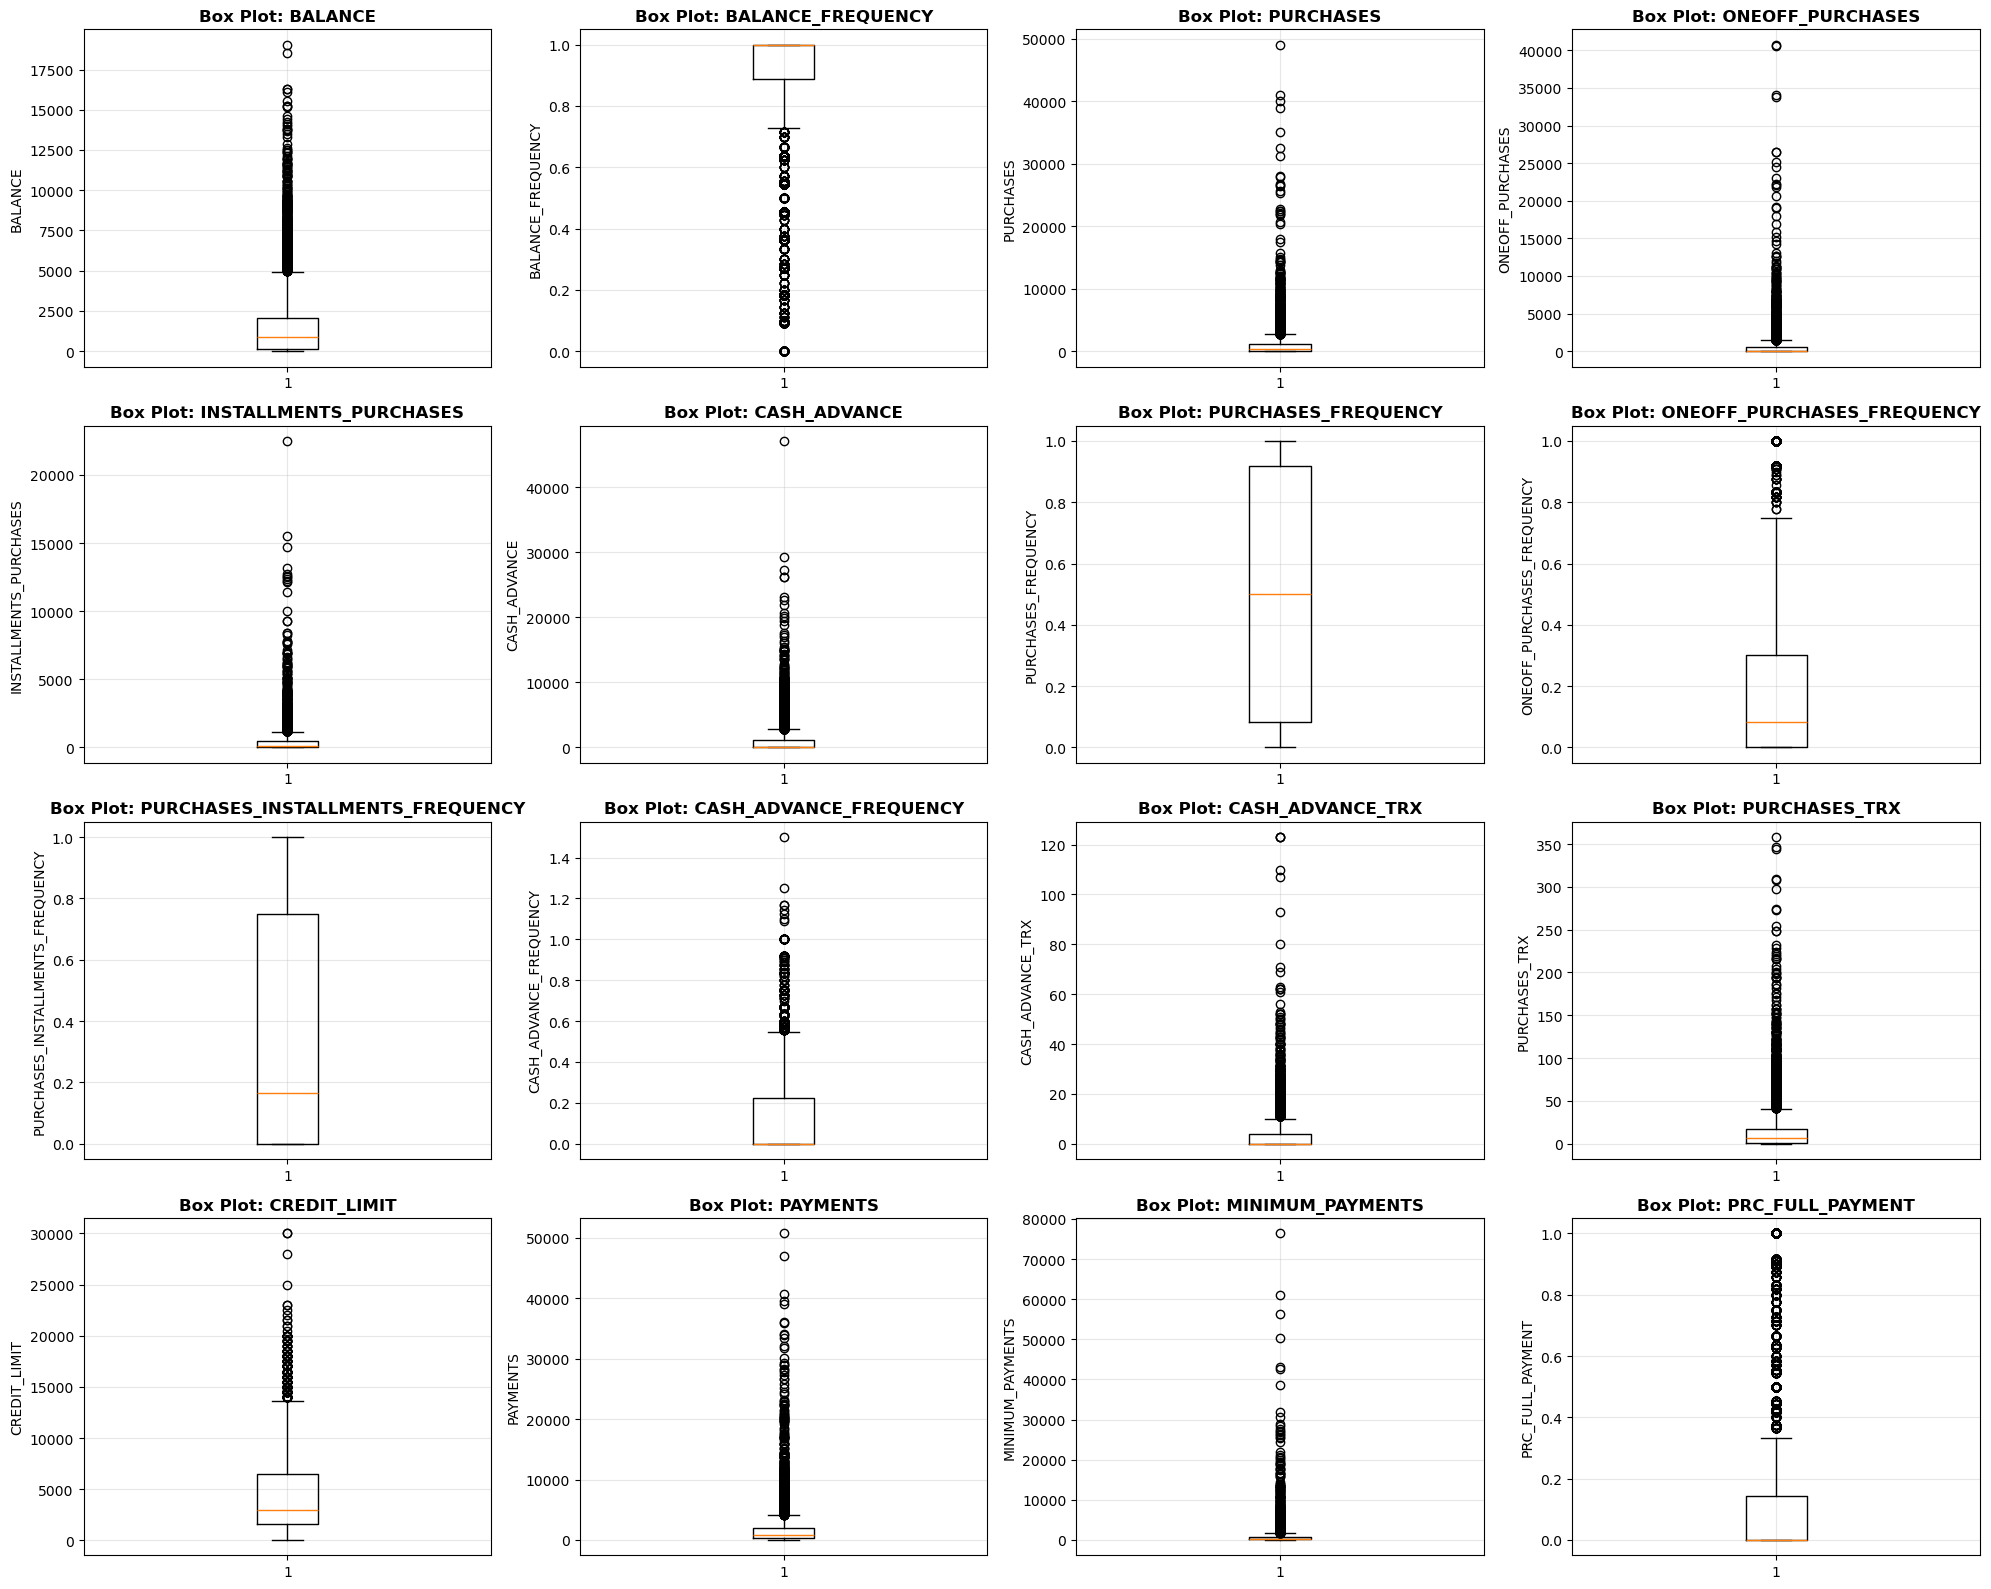

In [10]:
# Create box plots for outlier visualization
fig, axes = plt.subplots(4, 4, figsize=(20, 16))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols[:16]):
    axes[idx].boxplot(df[col].dropna(), vert=True)
    axes[idx].set_title(f'Box Plot: {col}', fontweight='bold')
    axes[idx].set_ylabel(col)
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('reports/figures/boxplots_outliers.png', dpi=300)
plt.show()



<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@400;700&family=Playfair+Display&display=swap" rel="stylesheet">

<p style="background-color:#1F4E79; font-family:'Playfair Display', 'Georgia', serif; color:white; font-size:32px; text-align:center; border-radius:15px 50px; padding:14px;">
  Step 5 | Data Preprocessing
</p>


<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@400;700&family=Playfair+Display&display=swap" rel="stylesheet">

<p style="background-color:#AED6F1; font-family:'Playfair Display', 'Georgia', serif; color:white; font-size:26px; text-align:center; border-radius:15px 50px; padding:14px;">
  5.1 Handling Missing Values
</p>

In [13]:
# Create a copy for preprocessing
df_processed = df.copy()

# Remove customer ID (not needed for clustering)
if 'CUST_ID' in df_processed.columns:
    customer_ids = df_processed['CUST_ID']
    df_processed = df_processed.drop('CUST_ID', axis=1)

# Check missing values
print(f"Missing values before imputation: {df_processed.isnull().sum().sum()}")

# Impute missing values with median (more robust to outliers than mean)
imputer = SimpleImputer(strategy='median')
df_processed_array = imputer.fit_transform(df_processed)
df_processed = pd.DataFrame(df_processed_array, columns=df_processed.columns)

print(f"Missing values after imputation: {df_processed.isnull().sum().sum()}")


Missing values before imputation: 314
Missing values after imputation: 0


<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@400;700&family=Playfair+Display&display=swap" rel="stylesheet">

<p style="background-color:#AED6F1; font-family:'Playfair Display', 'Georgia', serif; color:white; font-size:26px; text-align:center; border-radius:15px 50px; padding:14px;">
  5.2 Handling Outliers
</p>

In [14]:
def handle_outliers_iqr(df, columns, factor=1.5):
    """
    Handle outliers using Interquartile Range (IQR) method.
    
    Parameters:
    -----------
    df : DataFrame
        Input dataframe
    columns : list
        List of columns to process
    factor : float
        IQR multiplier (default 1.5)
    
    Returns:
    --------
    DataFrame with outliers capped
    """
    df_clean = df.copy()
    
    for col in columns:
        # Calculate quartiles
        Q1 = df_clean[col].quantile(0.25)  # 25th percentile
        Q3 = df_clean[col].quantile(0.75)  # 75th percentile
        IQR = Q3 - Q1                      # Interquartile range
        
        # Calculate bounds
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR
        
        # Cap outliers (better than removing - preserves data)
        df_clean[col] = df_clean[col].clip(lower=lower_bound, upper=upper_bound)
        
        # Report number of outliers capped
        outliers_count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        if outliers_count > 0:
            print(f"{col}: {outliers_count} outliers capped")
    
    return df_clean

# Apply outlier handling
print("\nHandling outliers:")
df_processed = handle_outliers_iqr(df_processed, df_processed.columns.tolist())
print(f"\nProcessed data shape: {df_processed.shape}")



Handling outliers:
BALANCE: 695 outliers capped
BALANCE_FREQUENCY: 1493 outliers capped
PURCHASES: 808 outliers capped
ONEOFF_PURCHASES: 1013 outliers capped
INSTALLMENTS_PURCHASES: 867 outliers capped
CASH_ADVANCE: 1030 outliers capped
ONEOFF_PURCHASES_FREQUENCY: 782 outliers capped
CASH_ADVANCE_FREQUENCY: 525 outliers capped
CASH_ADVANCE_TRX: 804 outliers capped
PURCHASES_TRX: 766 outliers capped
CREDIT_LIMIT: 248 outliers capped
PAYMENTS: 808 outliers capped
MINIMUM_PAYMENTS: 909 outliers capped
PRC_FULL_PAYMENT: 1474 outliers capped
TENURE: 1366 outliers capped

Processed data shape: (8950, 17)


<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@400;700&family=Playfair+Display&display=swap" rel="stylesheet">

<p style="background-color:#AED6F1; font-family:'Playfair Display', 'Georgia', serif; color:white; font-size:26px; text-align:center; border-radius:15px 50px; padding:14px;">
  5.3 Feature Scaling
</p>

In [16]:
# Standardization: Transform features to have mean=0 and std=1
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_processed)
df_scaled = pd.DataFrame(df_scaled, columns=df_processed.columns)

print("\nFeature Scaling Completed!")
print("\nScaled Data Statistics:")
print(df_scaled.describe())

# Verify scaling: mean should be ~0, std should be ~1
print(f"\nMean of scaled features: {df_scaled.mean().mean():.6f}")
print(f"Std of scaled features: {df_scaled.std().mean():.6f}")

# Save processed data
df_scaled.to_csv('D:\BIA\CREDIT_CARD_USAGE_SEGMENTATION\data\scaled_data.csv', index=False)



Feature Scaling Completed!

Scaled Data Statistics:
            BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count  8.950000e+03       8.950000e+03  8.950000e+03      8.950000e+03   
mean  -8.891708e-17      -1.244839e-15  1.460781e-16      1.333756e-16   
std    1.000056e+00       1.000056e+00  1.000056e+00      1.000056e+00   
min   -9.044240e-01      -1.886552e+00 -8.381596e-01     -6.923834e-01   
25%   -8.209860e-01      -3.847451e-01 -7.930935e-01     -6.923834e-01   
50%   -3.363510e-01       6.164594e-01 -4.273740e-01     -6.181349e-01   
75%    4.316433e-01       6.164594e-01  4.240895e-01      4.358132e-01   
max    2.310587e+00       6.164594e-01  2.249864e+00      2.128108e+00   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count            8.950000e+03  8.950000e+03         8.950000e+03   
mean             1.238488e-16  5.874878e-17         9.328354e-17   
std              1.000056e+00  1.000056e+00         1.000056e+00   
min     

<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@400;700&family=Playfair+Display&display=swap" rel="stylesheet">

<p style="background-color:#1F4E79; font-family:'Playfair Display', 'Georgia', serif; color:white; font-size:32px; text-align:center; border-radius:15px 50px; padding:14px;">
  Step 6 | Dimensionality Reduction
</p>


<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@400;700&family=Playfair+Display&display=swap" rel="stylesheet">

<p style="background-color:#AED6F1; font-family:'Playfair Display', 'Georgia', serif; color:white; font-size:26px; text-align:center; border-radius:15px 50px; padding:14px;">
  6.1 Principal Component Analysis (PCA)
</p>

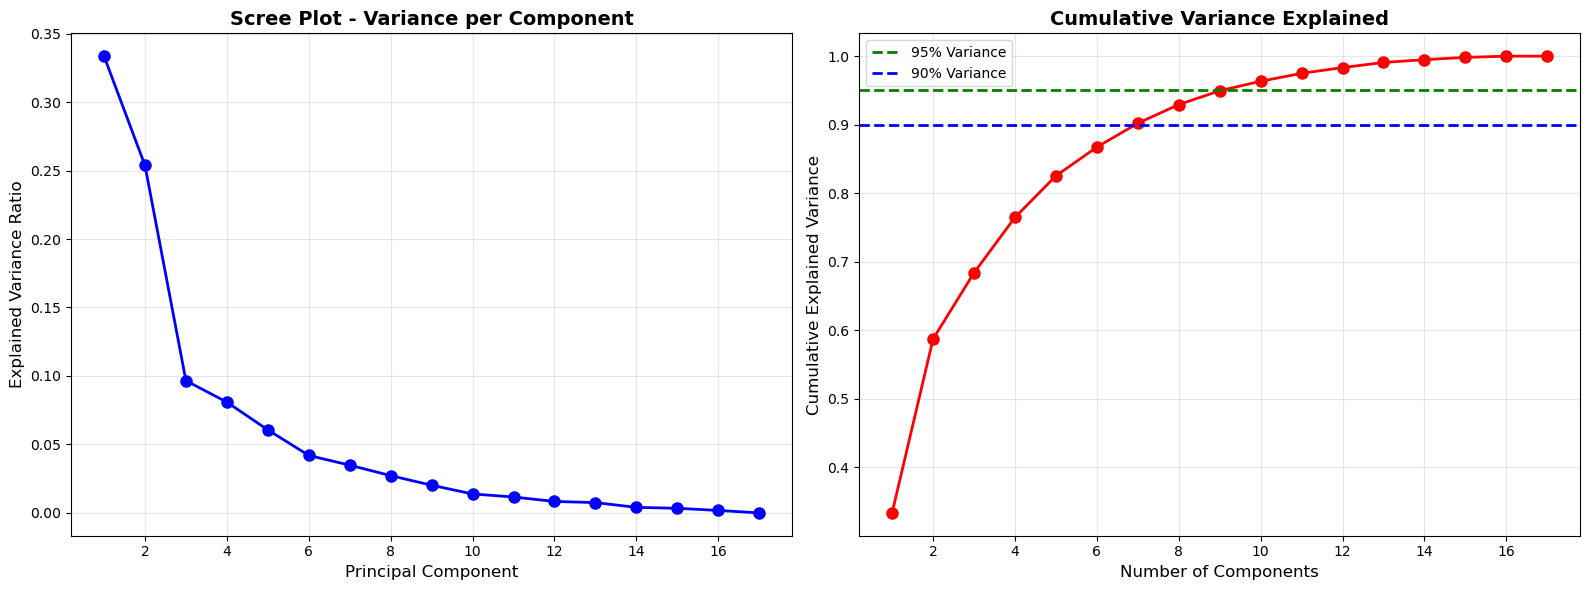


Components needed for 95% variance: 10
Original dimensions: 17
Reduced dimensions: 10

PCA completed successfully!
Shape after PCA: (8950, 10)


In [17]:
# Apply PCA to determine optimal components
pca_full = PCA()
pca_full.fit(df_scaled)

# Calculate cumulative variance explained
cumsum_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Plot variance explained
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scree plot
axes[0].plot(range(1, len(pca_full.explained_variance_ratio_) + 1),
             pca_full.explained_variance_ratio_, 
             'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Principal Component', fontsize=12)
axes[0].set_ylabel('Explained Variance Ratio', fontsize=12)
axes[0].set_title('Scree Plot - Variance per Component', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Cumulative variance plot
axes[1].plot(range(1, len(cumsum_variance) + 1), 
             cumsum_variance, 'ro-', linewidth=2, markersize=8)
axes[1].axhline(y=0.95, color='green', linestyle='--', linewidth=2, label='95% Variance')
axes[1].axhline(y=0.90, color='blue', linestyle='--', linewidth=2, label='90% Variance')
axes[1].set_xlabel('Number of Components', fontsize=12)
axes[1].set_ylabel('Cumulative Explained Variance', fontsize=12)
axes[1].set_title('Cumulative Variance Explained', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('reports/figures/pca_variance_explained.png', dpi=300)
plt.show()

# Select components that explain 95% variance
n_components = np.argmax(cumsum_variance >= 0.95) + 1
print(f"\nComponents needed for 95% variance: {n_components}")
print(f"Original dimensions: {df_scaled.shape[1]}")
print(f"Reduced dimensions: {n_components}")

# Apply PCA transformation
pca = PCA(n_components=n_components)
df_pca = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(n_components)])

print(f"\nPCA completed successfully!")
print(f"Shape after PCA: {df_pca.shape}")


<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@400;700&family=Playfair+Display&display=swap" rel="stylesheet">

<p style="background-color:#AED6F1; font-family:'Playfair Display', 'Georgia', serif; color:white; font-size:26px; text-align:center; border-radius:15px 50px; padding:14px;">
  6.2  t-SNE for Visualization
</p>


Applying t-SNE (this may take a few minutes)...
t-SNE completed!


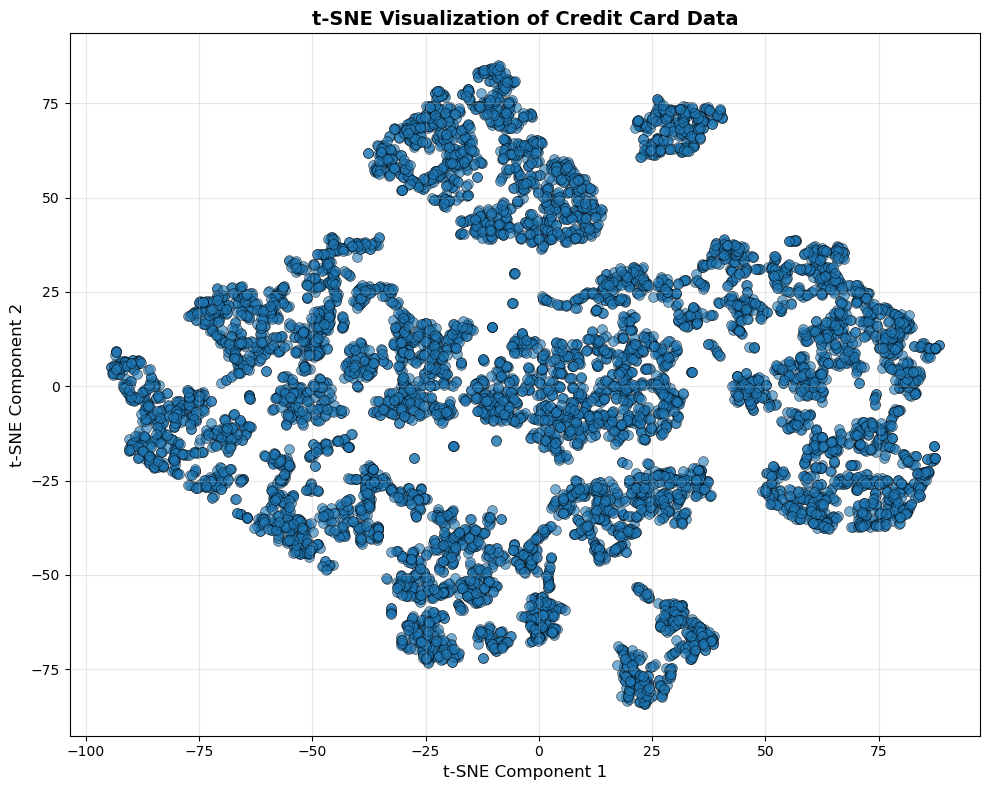

In [37]:
# Apply t-SNE for 2D visualization
print("\nApplying t-SNE (this may take a few minutes)...")

tsne = TSNE(
    n_components=2,      # Reduce to 2D for visualization
    random_state=42,     # For reproducibility
    perplexity=30,       # Balances local vs global structure
    n_iter=1000          # Number of iterations
)

# Use PCA-reduced data for faster t-SNE computation
df_tsne = tsne.fit_transform(df_pca)
df_tsne = pd.DataFrame(df_tsne, columns=['TSNE1', 'TSNE2'])

print("t-SNE completed!")

# Visualize t-SNE (without clusters - raw data)
plt.figure(figsize=(10, 8))
plt.scatter(df_tsne['TSNE1'], df_tsne['TSNE2'], 
           alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
plt.xlabel('t-SNE Component 1', fontsize=12)
plt.ylabel('t-SNE Component 2', fontsize=12)
plt.title('t-SNE Visualization of Credit Card Data', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('reports/figures/tsne_visualization.png', dpi=300)
plt.show()


<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@400;700&family=Playfair+Display&display=swap" rel="stylesheet">

<p style="background-color:#1F4E79; font-family:'Playfair Display', 'Georgia', serif; color:white; font-size:32px; text-align:center; border-radius:15px 50px; padding:14px;">
  Step 7 | Determining Optimal Number of Clusters
</p>


<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@400;700&family=Playfair+Display&display=swap" rel="stylesheet">

<p style="background-color:#AED6F1; font-family:'Playfair Display', 'Georgia', serif; color:white; font-size:26px; text-align:center; border-radius:15px 50px; padding:14px;">
  7.1 Elbow Method
</p>


Calculating optimal K...
K=2: Inertia=104271.04, Silhouette=0.241
K=3: Inertia=82293.92, Silhouette=0.247
K=4: Inertia=71563.88, Silhouette=0.220
K=5: Inertia=65313.97, Silhouette=0.214
K=6: Inertia=60263.60, Silhouette=0.216
K=7: Inertia=56170.02, Silhouette=0.221
K=8: Inertia=52772.45, Silhouette=0.215
K=9: Inertia=49935.89, Silhouette=0.214
K=10: Inertia=47760.14, Silhouette=0.213


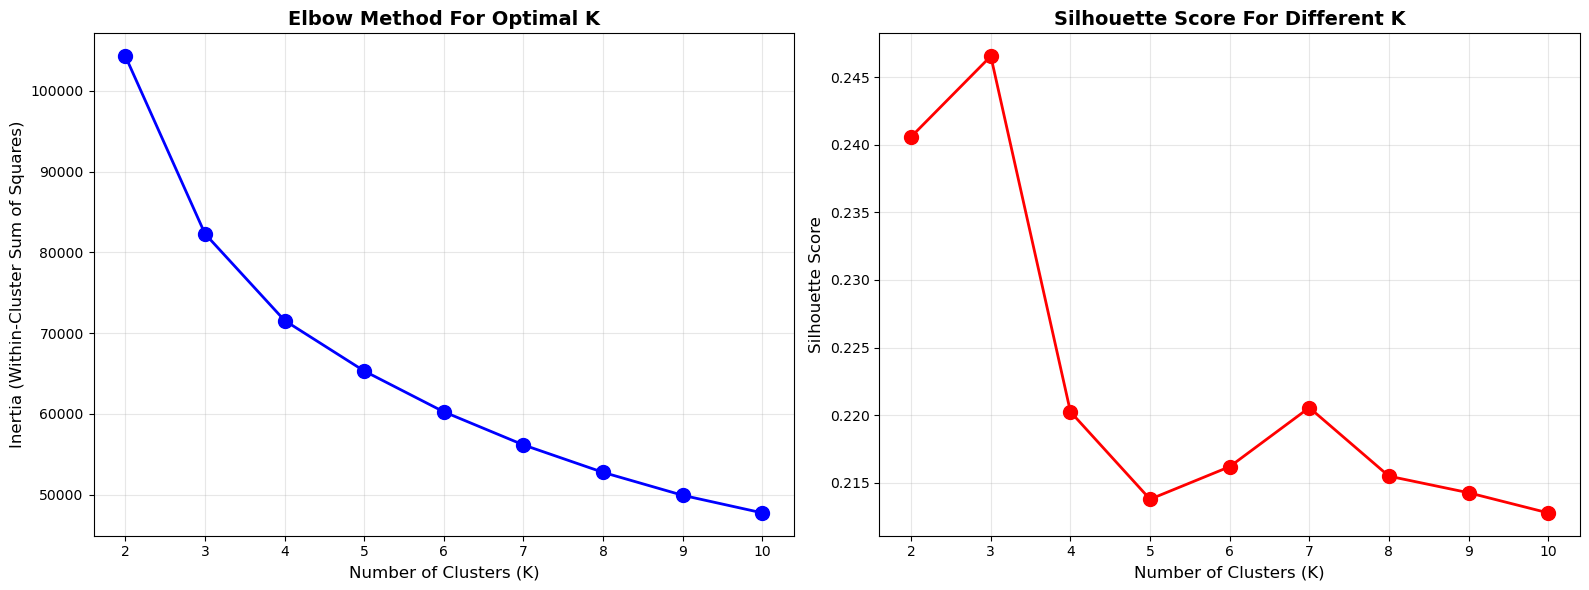

In [19]:
# Calculate inertia (WCSS) for different K values
inertias = []
silhouette_scores = []
K_range = range(2, 11)  # Test K from 2 to 10

print("\nCalculating optimal K...")
for k in K_range:
    # Fit K-Means
    kmeans = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=10,        # Number of times to run with different seeds
        max_iter=300      # Maximum iterations
    )
    kmeans.fit(df_pca)
    
    # Store metrics
    inertias.append(kmeans.inertia_)
    sil_score = silhouette_score(df_pca, kmeans.labels_)
    silhouette_scores.append(sil_score)
    
    print(f"K={k}: Inertia={kmeans.inertia_:.2f}, Silhouette={sil_score:.3f}")

# Plot Elbow Method and Silhouette Scores
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Elbow plot
axes[0].plot(K_range, inertias, 'bo-', linewidth=2, markersize=10)
axes[0].set_xlabel('Number of Clusters (K)', fontsize=12)
axes[0].set_ylabel('Inertia (Within-Cluster Sum of Squares)', fontsize=12)
axes[0].set_title('Elbow Method For Optimal K', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].set_xticks(K_range)

# Silhouette score plot
axes[1].plot(K_range, silhouette_scores, 'ro-', linewidth=2, markersize=10)
axes[1].set_xlabel('Number of Clusters (K)', fontsize=12)
axes[1].set_ylabel('Silhouette Score', fontsize=12)
axes[1].set_title('Silhouette Score For Different K', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].set_xticks(K_range)

plt.tight_layout()
plt.savefig('reports/figures/optimal_k_selection.png', dpi=300)
plt.show()


<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@400;700&family=Playfair+Display&display=swap" rel="stylesheet">

<p style="background-color:#AED6F1; font-family:'Playfair Display', 'Georgia', serif; color:white; font-size:26px; text-align:center; border-radius:15px 50px; padding:14px;">
  7.2 Silhouette Analysis
</p>

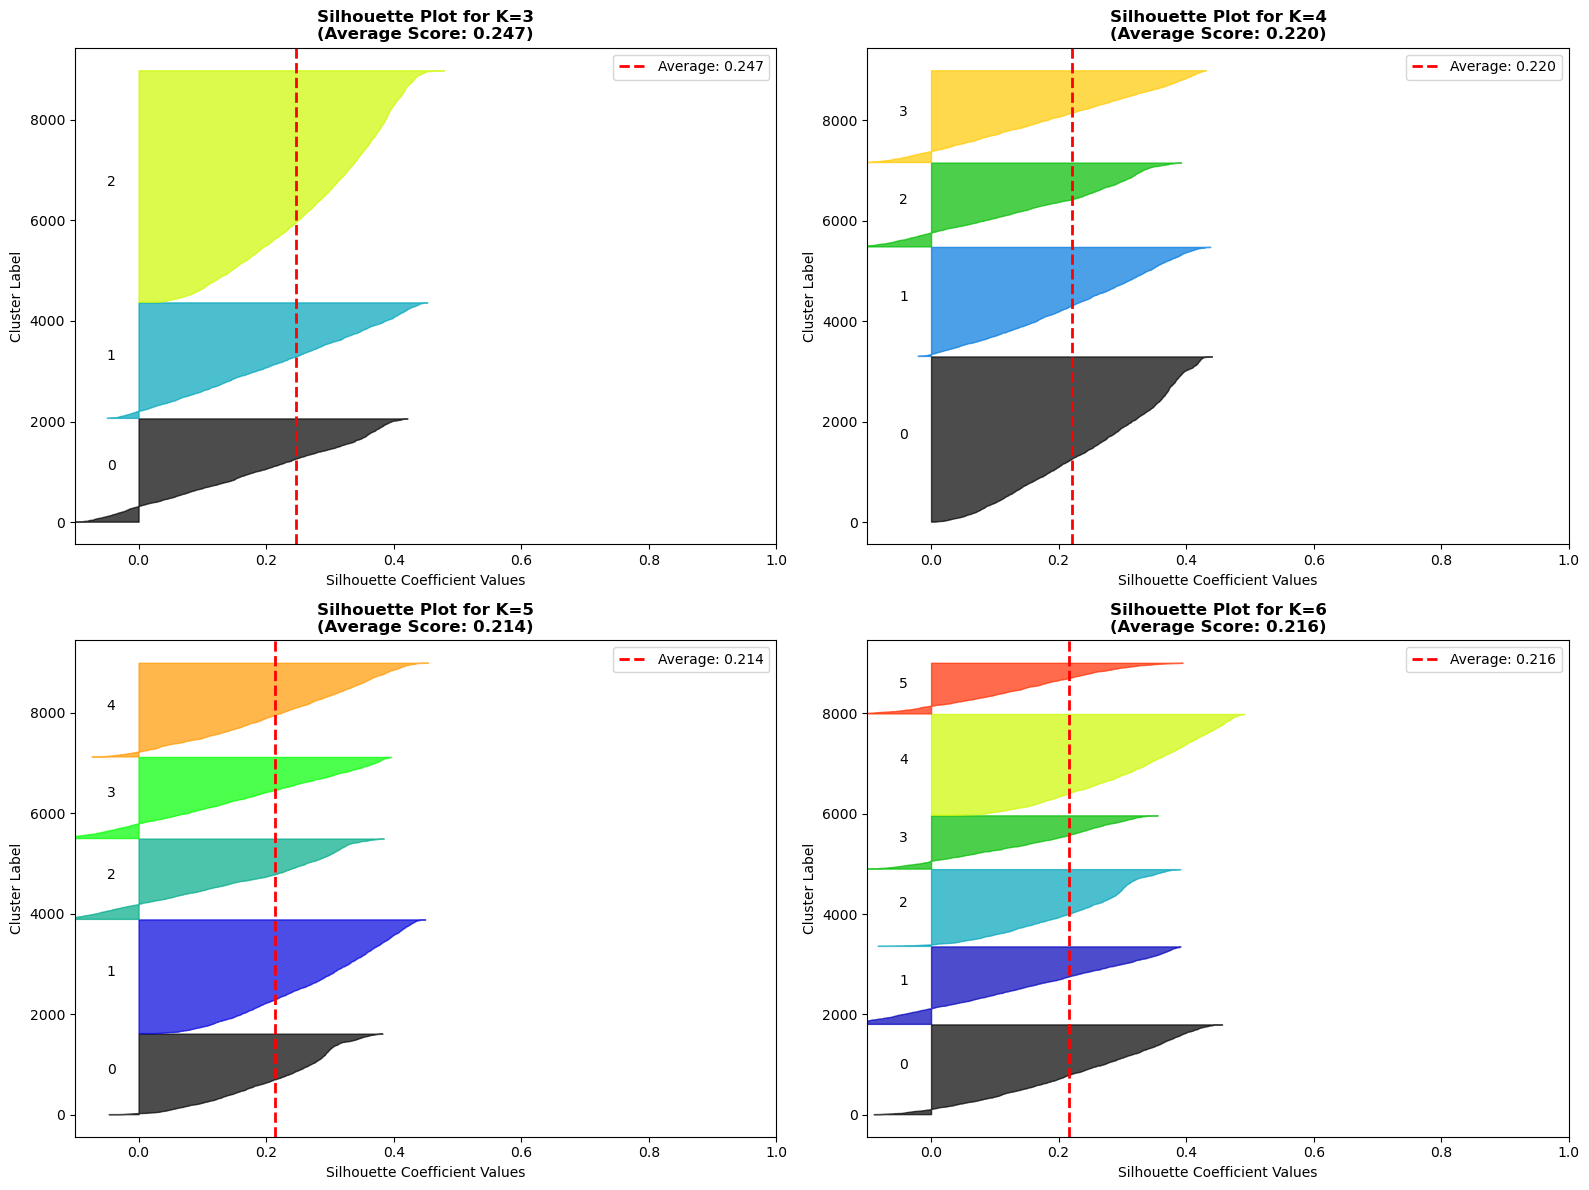

In [20]:
# Detailed silhouette analysis for specific K values
K_analyze = [3, 4, 5, 6]

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for idx, n_clusters in enumerate(K_analyze):
    # Fit K-Means
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df_pca)
    
    # Calculate silhouette scores
    silhouette_avg = silhouette_score(df_pca, cluster_labels)
    sample_silhouette_values = silhouette_samples(df_pca, cluster_labels)
    
    # Create silhouette plot
    y_lower = 10
    for i in range(n_clusters):
        # Get silhouette values for cluster i
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Color for this cluster
        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        
        # Fill the silhouette
        axes[idx].fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7
        )
        
        # Label the cluster
        axes[idx].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
    
    # Formatting
    axes[idx].set_title(
        f'Silhouette Plot for K={n_clusters}\n(Average Score: {silhouette_avg:.3f})',
        fontsize=12, fontweight='bold'
    )
    axes[idx].set_xlabel('Silhouette Coefficient Values')
    axes[idx].set_ylabel('Cluster Label')
    axes[idx].axvline(x=silhouette_avg, color='red', linestyle='--', 
                     linewidth=2, label=f'Average: {silhouette_avg:.3f}')
    axes[idx].set_xlim([-0.1, 1])
    axes[idx].legend()

plt.tight_layout()
plt.savefig('reports/figures/silhouette_analysis.png', dpi=300)
plt.show()


<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@400;700&family=Playfair+Display&display=swap" rel="stylesheet">

<p style="background-color:#1F4E79; font-family:'Playfair Display', 'Georgia', serif; color:white; font-size:32px; text-align:center; border-radius:15px 50px; padding:14px;">
  Step 8 | K-Means Clustering
</p>



Applying K-Means Clustering with K=4

K-Means Clustering Results:
  Silhouette Score: 0.220
  Davies-Bouldin Index: 1.464 (lower is better)
  Calinski-Harabasz Index: 2766.19 (higher is better)

Cluster Distribution:
  Cluster 0: 1831 customers (20.5%)
  Cluster 1: 3296 customers (36.8%)
  Cluster 2: 1669 customers (18.6%)
  Cluster 3: 2154 customers (24.1%)


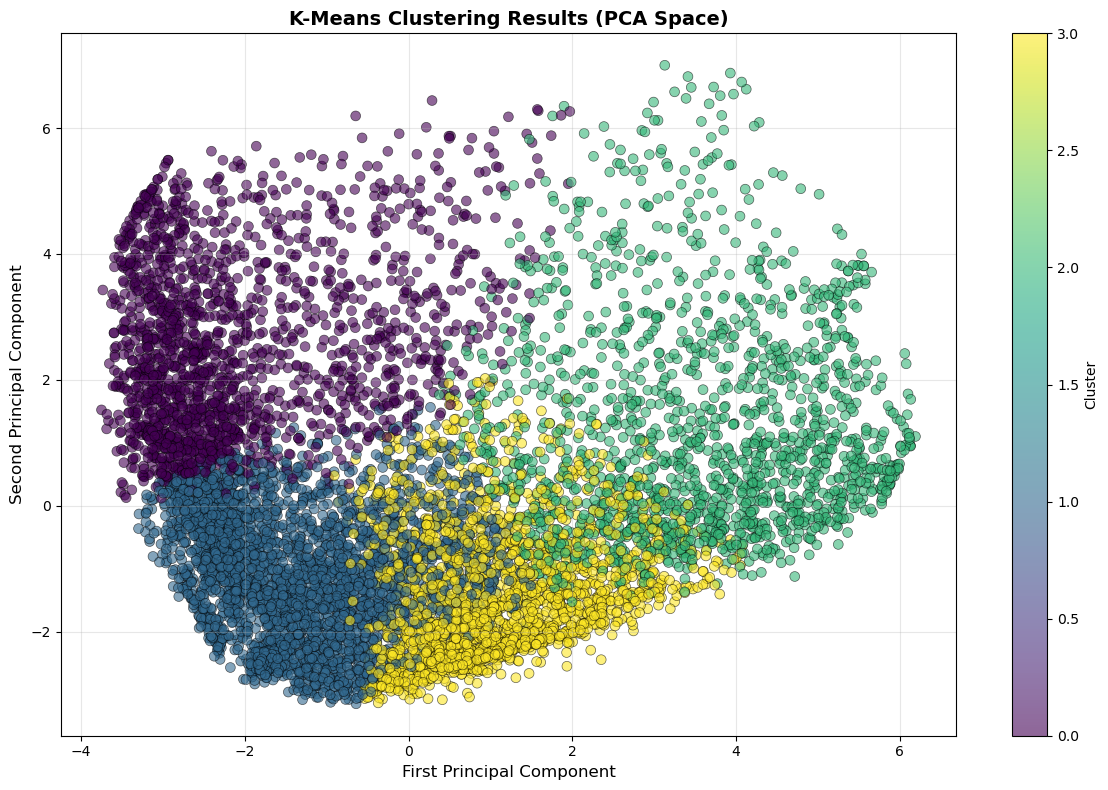

In [21]:
# Apply K-Means with optimal K (based on your analysis)
optimal_k = 4  # Adjust based on your elbow/silhouette analysis

print(f"\nApplying K-Means Clustering with K={optimal_k}")

# Initialize and fit K-Means
kmeans_final = KMeans(
    n_clusters=optimal_k,
    init='k-means++',    # Smart initialization
    n_init=10,           # Run 10 times with different seeds
    max_iter=300,        # Maximum iterations
    random_state=42      # For reproducibility
)

# Fit and predict clusters
cluster_labels = kmeans_final.fit_predict(df_scaled)

# Add cluster labels to dataframes
df_scaled['Cluster_KMeans'] = cluster_labels
df_pca['Cluster_KMeans'] = cluster_labels
df_tsne['Cluster_KMeans'] = cluster_labels

# Evaluate clustering performance
sil_score = silhouette_score(df_pca.drop('Cluster_KMeans', axis=1), cluster_labels)
db_score = davies_bouldin_score(df_pca.drop('Cluster_KMeans', axis=1), cluster_labels)
ch_score = calinski_harabasz_score(df_pca.drop('Cluster_KMeans', axis=1), cluster_labels)

print(f"\nK-Means Clustering Results:")
print(f"  Silhouette Score: {sil_score:.3f}")
print(f"  Davies-Bouldin Index: {db_score:.3f} (lower is better)")
print(f"  Calinski-Harabasz Index: {ch_score:.2f} (higher is better)")

# Cluster distribution
print(f"\nCluster Distribution:")
cluster_dist = df_scaled['Cluster_KMeans'].value_counts().sort_index()
for cluster, count in cluster_dist.items():
    percentage = (count / len(df_scaled)) * 100
    print(f"  Cluster {cluster}: {count} customers ({percentage:.1f}%)")

# Visualize clusters on PCA space
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    df_pca['PC1'], 
    df_pca['PC2'],
    c=df_pca['Cluster_KMeans'],
    cmap='viridis',
    s=50,
    alpha=0.6,
    edgecolors='black',
    linewidth=0.5
)
plt.colorbar(scatter, label='Cluster')
plt.xlabel('First Principal Component', fontsize=12)
plt.ylabel('Second Principal Component', fontsize=12)
plt.title('K-Means Clustering Results (PCA Space)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('reports/figures/kmeans_pca_clusters.png', dpi=300)
plt.show()


<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@400;700&family=Playfair+Display&display=swap" rel="stylesheet">

<p style="background-color:#1F4E79; font-family:'Playfair Display', 'Georgia', serif; color:white; font-size:32px; text-align:center; border-radius:15px 50px; padding:14px;">
  Step 9 | Agglomerative Hierarchical Clustering
</p>

<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@400;700&family=Playfair+Display&display=swap" rel="stylesheet">

<p style="background-color:#AED6F1; font-family:'Playfair Display', 'Georgia', serif; color:white; font-size:26px; text-align:center; border-radius:15px 50px; padding:14px;">
  9.1 Dendrogram Visualization
</p>


Creating dendrogram...


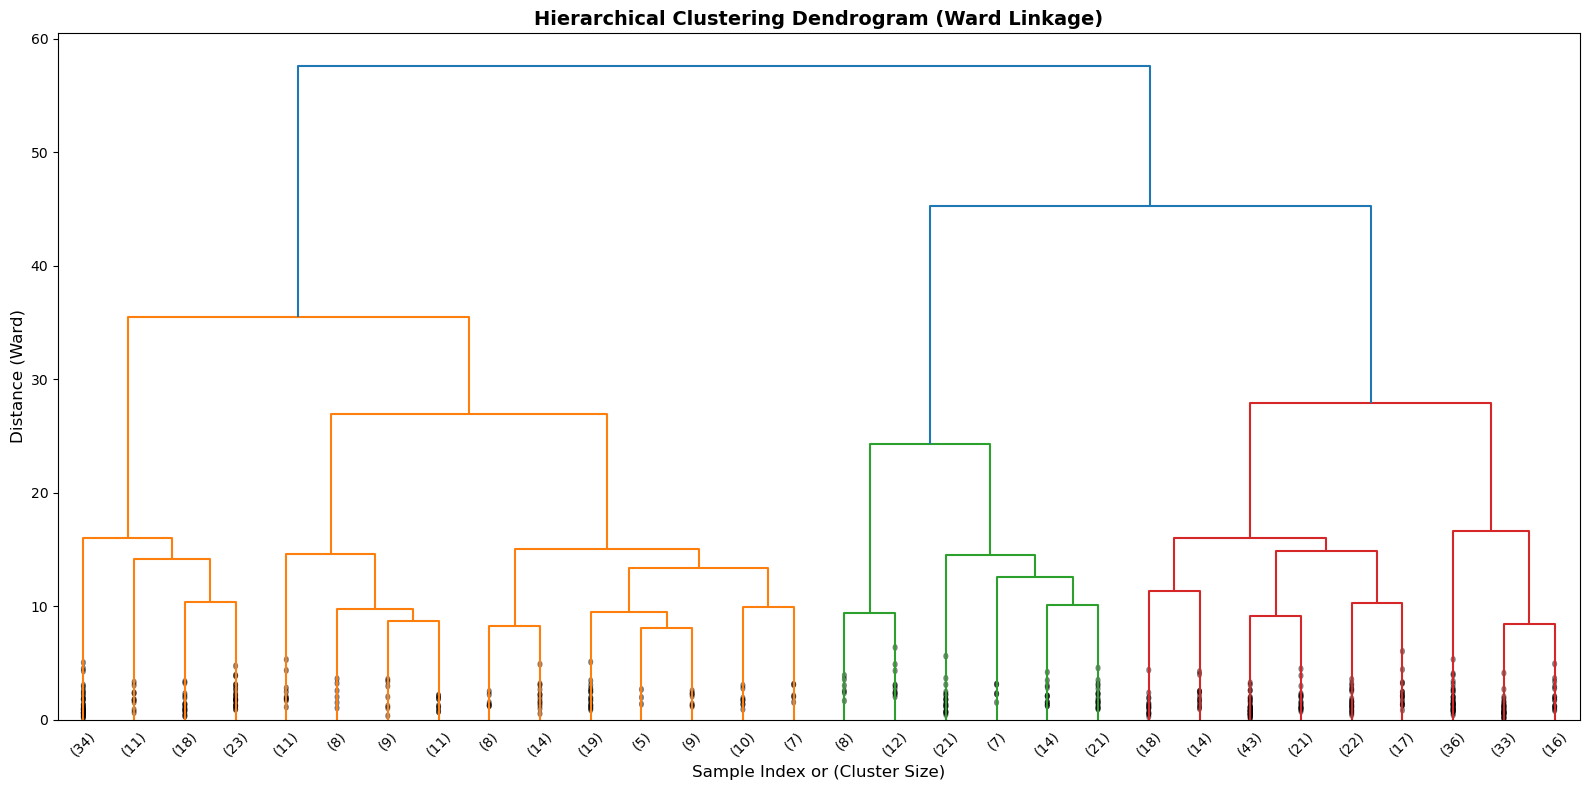

In [22]:
# Create dendrogram (use sample for large datasets)
print("\nCreating dendrogram...")

# Sample data for visualization (dendrograms are slow on large datasets)
sample_size = min(500, len(df_pca))
df_sample = df_pca.drop('Cluster_KMeans', axis=1).sample(n=sample_size, random_state=42)

# Perform hierarchical clustering
linkage_matrix = linkage(df_sample, method='ward')

# Plot dendrogram
plt.figure(figsize=(16, 8))
dendrogram(
    linkage_matrix,
    truncate_mode='lastp',  # Show only last p merged clusters
    p=30,                   # Number of clusters to show
    leaf_font_size=10,
    show_contracted=True
)
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage)', 
         fontsize=14, fontweight='bold')
plt.xlabel('Sample Index or (Cluster Size)', fontsize=12)
plt.ylabel('Distance (Ward)', fontsize=12)
plt.tight_layout()
plt.savefig('reports/figures/dendrogram.png', dpi=300)
plt.show()


<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@400;700&family=Playfair+Display&display=swap" rel="stylesheet">

<p style="background-color:#AED6F1; font-family:'Playfair Display', 'Georgia', serif; color:white; font-size:26px; text-align:center; border-radius:15px 50px; padding:14px;">
  9.2 Apply Agglomerative Clustering
</p>

In [23]:
# Apply Agglomerative Clustering
print(f"\nApplying Agglomerative Clustering with K={optimal_k}")

agg_clustering = AgglomerativeClustering(
    n_clusters=optimal_k,
    linkage='ward',      # Minimizes within-cluster variance
    metric='euclidean'   # Distance metric
)

# Fit and predict
agg_labels = agg_clustering.fit_predict(df_scaled.drop('Cluster_KMeans', axis=1))

# Add labels
df_scaled['Cluster_Agglomerative'] = agg_labels
df_pca['Cluster_Agglomerative'] = agg_labels
df_tsne['Cluster_Agglomerative'] = agg_labels

# Evaluate
sil_score_agg = silhouette_score(
    df_pca.drop(['Cluster_KMeans', 'Cluster_Agglomerative'], axis=1), 
    agg_labels
)
db_score_agg = davies_bouldin_score(
    df_pca.drop(['Cluster_KMeans', 'Cluster_Agglomerative'], axis=1), 
    agg_labels
)
ch_score_agg = calinski_harabasz_score(
    df_pca.drop(['Cluster_KMeans', 'Cluster_Agglomerative'], axis=1), 
    agg_labels
)

print(f"\nAgglomerative Clustering Results:")
print(f"  Silhouette Score: {sil_score_agg:.3f}")
print(f"  Davies-Bouldin Index: {db_score_agg:.3f} (lower is better)")
print(f"  Calinski-Harabasz Index: {ch_score_agg:.2f} (higher is better)")

print(f"\nCluster Distribution:")
cluster_dist_agg = df_scaled['Cluster_Agglomerative'].value_counts().sort_index()
for cluster, count in cluster_dist_agg.items():
    percentage = (count / len(df_scaled)) * 100
    print(f"  Cluster {cluster}: {count} customers ({percentage:.1f}%)")



Applying Agglomerative Clustering with K=4

Agglomerative Clustering Results:
  Silhouette Score: 0.178
  Davies-Bouldin Index: 1.540 (lower is better)
  Calinski-Harabasz Index: 2100.41 (higher is better)

Cluster Distribution:
  Cluster 0: 3838 customers (42.9%)
  Cluster 1: 1538 customers (17.2%)
  Cluster 2: 1584 customers (17.7%)
  Cluster 3: 1990 customers (22.2%)


<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@400;700&family=Playfair+Display&display=swap" rel="stylesheet">

<p style="background-color:#1F4E79; font-family:'Playfair Display', 'Georgia', serif; color:white; font-size:32px; text-align:center; border-radius:15px 50px; padding:14px;">
  Step 10 | Model Comparison and Selection
</p>


MODEL COMPARISON
    Algorithm  Silhouette Score  Davies-Bouldin Index  Calinski-Harabasz Index Computation Time
      K-Means          0.220165              1.464172              2766.191491             Fast
Agglomerative          0.178045              1.540012              2100.406389         Moderate


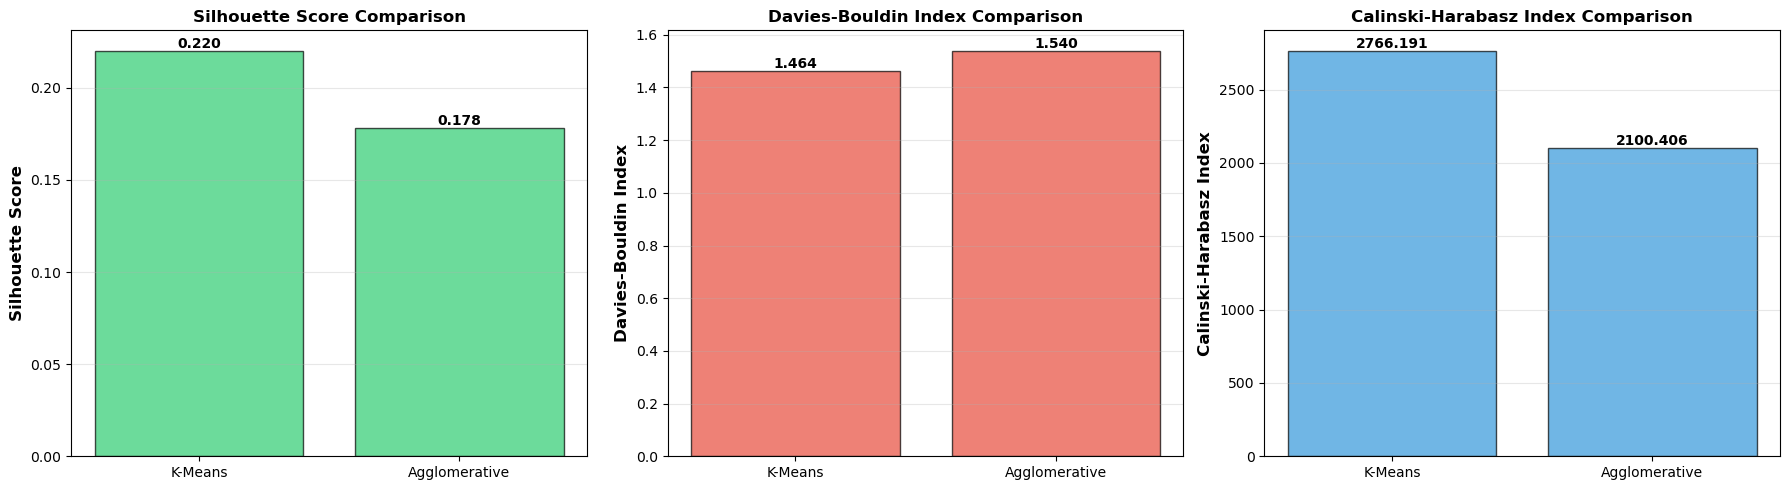

In [26]:
# Create comparison dataframe
comparison_data = {
    'Algorithm': ['K-Means', 'Agglomerative'],
    'Silhouette Score': [sil_score, sil_score_agg],
    'Davies-Bouldin Index': [db_score, db_score_agg],
    'Calinski-Harabasz Index': [ch_score, ch_score_agg],
    'Computation Time': ['Fast', 'Moderate']
}

comparison_df = pd.DataFrame(comparison_data)

print("\n" + "="*70)
print("MODEL COMPARISON")
print("="*70)
print(comparison_df.to_string(index=False))

# Save comparison
comparison_df.to_csv('D:\BIA\CREDIT_CARD_USAGE_SEGMENTATION\data\model_comparison.csv', index=False)

# Visualize comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

metrics = ['Silhouette Score', 'Davies-Bouldin Index', 'Calinski-Harabasz Index']
colors = ['#2ecc71', '#e74c3c', '#3498db']

for idx, metric in enumerate(metrics):
    axes[idx].bar(
        comparison_df['Algorithm'], 
        comparison_df[metric],
        color=colors[idx],
        edgecolor='black',
        alpha=0.7
    )
    axes[idx].set_ylabel(metric, fontsize=12, fontweight='bold')
    axes[idx].set_title(f'{metric} Comparison', fontsize=12, fontweight='bold')
    axes[idx].grid(True, alpha=0.3, axis='y')
    
    # Add value labels
    for i, v in enumerate(comparison_df[metric]):
        axes[idx].text(i, v, f'{v:.3f}', 
                      ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('D:\BIA\CREDIT_CARD_USAGE_SEGMENTATION\data\model_comparison.png', dpi=300)
plt.show()


<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@400;700&family=Playfair+Display&display=swap" rel="stylesheet">

<p style="background-color:#1F4E79; font-family:'Playfair Display', 'Georgia', serif; color:white; font-size:32px; text-align:center; border-radius:15px 50px; padding:14px;">
  Step 11 | Cluster Profiling and Interpretation
</p>


CLUSTER PROFILES (Mean Values)
             BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
Cluster                                                                  
0        3089.681753           0.968182   278.203711        161.063946   
1         794.390303           0.887060   260.545168        205.928978   
2        1868.383135           0.979688  2213.207472       1180.717564   
3         488.025130           0.931343   712.857643        105.495696   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster                                                              
0                    100.507529   2135.525350             0.218386   
1                     46.703729    360.491536             0.192903   
2                    684.644357    421.951224             0.898701   
3                    540.623215    100.293992             0.860275   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
Cluster                      

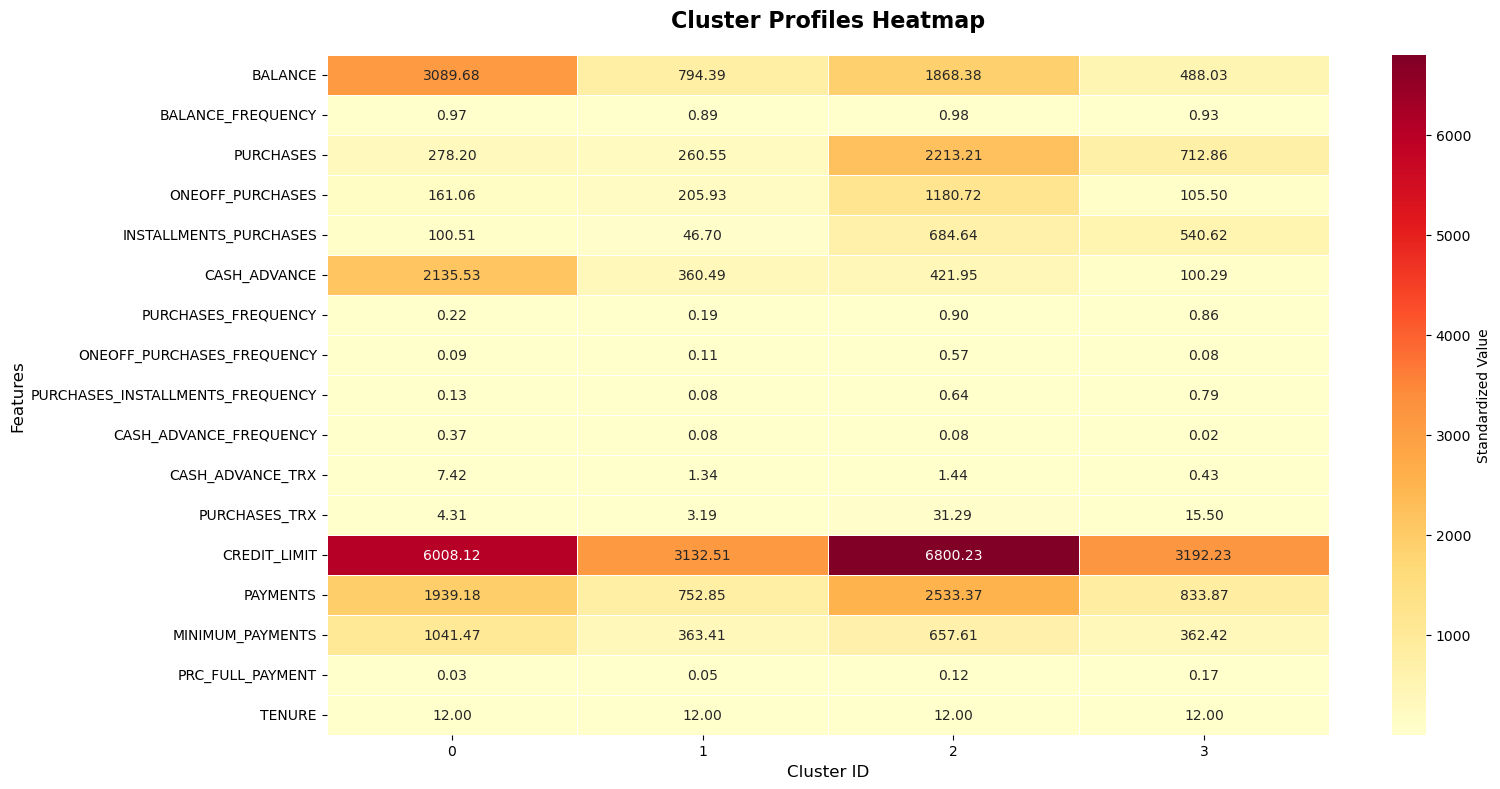


CLUSTER INTERPRETATION

### CLUSTER 0 ###
Top 5 Distinguishing Features:
  - CREDIT_LIMIT: High (6008.12)
  - BALANCE: High (3089.68)
  - CASH_ADVANCE: High (2135.53)
  - PAYMENTS: High (1939.18)
  - MINIMUM_PAYMENTS: High (1041.47)
Cluster Size: 1831 customers (20.5%)

### CLUSTER 1 ###
Top 5 Distinguishing Features:
  - CREDIT_LIMIT: High (3132.51)
  - BALANCE: High (794.39)
  - PAYMENTS: High (752.85)
  - MINIMUM_PAYMENTS: High (363.41)
  - CASH_ADVANCE: High (360.49)
Cluster Size: 3296 customers (36.8%)

### CLUSTER 2 ###
Top 5 Distinguishing Features:
  - CREDIT_LIMIT: High (6800.23)
  - PAYMENTS: High (2533.37)
  - PURCHASES: High (2213.21)
  - BALANCE: High (1868.38)
  - ONEOFF_PURCHASES: High (1180.72)
Cluster Size: 1669 customers (18.6%)

### CLUSTER 3 ###
Top 5 Distinguishing Features:
  - CREDIT_LIMIT: High (3192.23)
  - PAYMENTS: High (833.87)
  - PURCHASES: High (712.86)
  - INSTALLMENTS_PURCHASES: High (540.62)
  - BALANCE: High (488.03)
Cluster Size: 2154 customers (24.

In [28]:
# Add cluster labels to original data
df_processed['Cluster'] = df_scaled['Cluster_KMeans']  # Use best model

# Calculate mean values for each cluster
cluster_profiles = df_processed.groupby('Cluster').mean()

print("\n" + "="*70)
print("CLUSTER PROFILES (Mean Values)")
print("="*70)
print(cluster_profiles)

# Save cluster profiles
cluster_profiles.to_csv('D:\BIA\CREDIT_CARD_USAGE_SEGMENTATION\data\cluster_profiles.csv')

# Create cluster profile heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(
    cluster_profiles.T,
    annot=True,
    fmt='.2f',
    cmap='YlOrRd',
    cbar_kws={'label': 'Standardized Value'},
    linewidths=0.5
)
plt.title('Cluster Profiles Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Cluster ID', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()
plt.savefig('D:\BIA\CREDIT_CARD_USAGE_SEGMENTATION\data\cluster_profiles_heatmap.png', dpi=300)
plt.show()

# Analyze cluster characteristics
print("\n" + "="*70)
print("CLUSTER INTERPRETATION")
print("="*70)

for cluster_id in range(optimal_k):
    print(f"\n### CLUSTER {cluster_id} ###")
    cluster_data = cluster_profiles.loc[cluster_id]
    
    # Find top 5 distinguishing features
    top_features = cluster_data.abs().sort_values(ascending=False).head(5)
    print(f"Top 5 Distinguishing Features:")
    for feature, value in top_features.items():
        direction = "High" if cluster_data[feature] > 0 else "Low"
        print(f"  - {feature}: {direction} ({value:.2f})")
    
    # Calculate cluster size
    cluster_size = (df_processed['Cluster'] == cluster_id).sum()
    cluster_pct = (cluster_size / len(df_processed)) * 100
    print(f"Cluster Size: {cluster_size} customers ({cluster_pct:.1f}%)")


<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@400;700&family=Playfair+Display&display=swap" rel="stylesheet">

<p style="background-color:#1F4E79; font-family:'Playfair Display', 'Georgia', serif; color:white; font-size:32px; text-align:center; border-radius:15px 50px; padding:14px;">
  Step 12 | Visualization with t-SNE
</p>

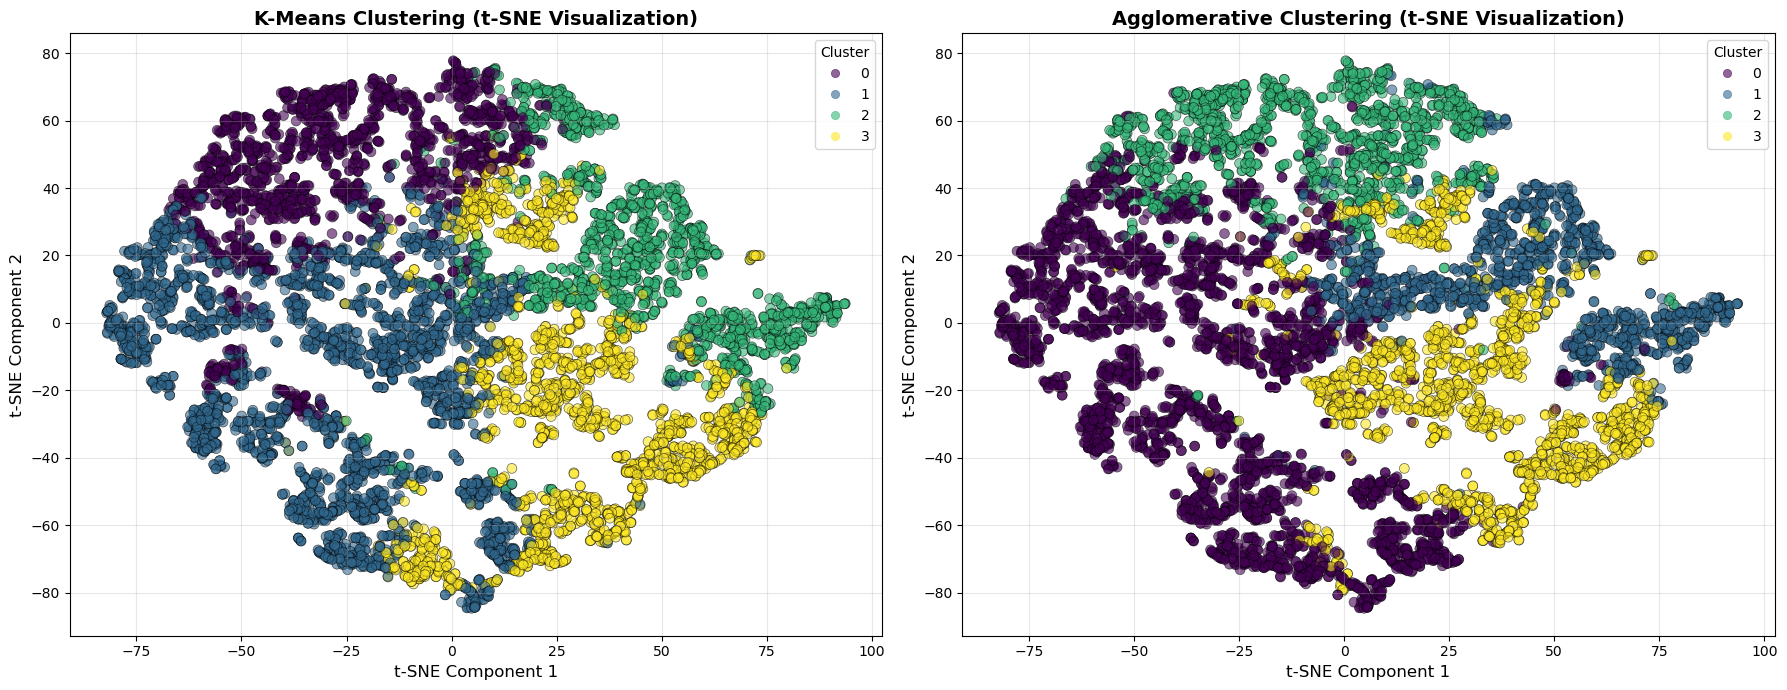

In [35]:
# Visualize clusters using t-SNE
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# K-Means clusters
scatter1 = axes[0].scatter(
    df_tsne['TSNE1'], 
    df_tsne['TSNE2'],
    c=df_tsne['Cluster_KMeans'],
    cmap='viridis',
    s=50,
    alpha=0.6,
    edgecolors='black',
    linewidth=0.5
)
axes[0].set_xlabel('t-SNE Component 1', fontsize=12)
axes[0].set_ylabel('t-SNE Component 2', fontsize=12)
axes[0].set_title('K-Means Clustering (t-SNE Visualization)', 
                 fontsize=14, fontweight='bold')
axes[0].legend(*scatter1.legend_elements(), title="Cluster", loc='best')
axes[0].grid(True, alpha=0.3)

# Agglomerative clusters
scatter2 = axes[1].scatter(
    df_tsne['TSNE1'], 
    df_tsne['TSNE2'],
    c=df_tsne['Cluster_Agglomerative'],
    cmap='viridis',
    s=50,
    alpha=0.6,
    edgecolors='black',
    linewidth=0.5
)
axes[1].set_xlabel('t-SNE Component 1', fontsize=12)
axes[1].set_ylabel('t-SNE Component 2', fontsize=12)
axes[1].set_title('Agglomerative Clustering (t-SNE Visualization)', 
                 fontsize=14, fontweight='bold')
axes[1].legend(*scatter2.legend_elements(), title="Cluster", loc='best')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('reports/figures/tsne_clusters.png', dpi=300)
plt.show()


<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@400;700&family=Playfair+Display&display=swap" rel="stylesheet">

<p style="background-color:#1F4E79; font-family:'Playfair Display', 'Georgia', serif; color:white; font-size:32px; text-align:center; border-radius:15px 50px; padding:14px;">
  Step 13 | Business Recommendations
</p>

In [36]:
# Generate recommendations for each cluster
recommendations = {
    0: """
    HIGH-VALUE CUSTOMERS
    - Characteristics: High spending, high credit limit, frequent purchases
    - Strategy:
      * Offer premium rewards and loyalty programs
      * Provide exclusive benefits and higher credit limits
      * Personalized high-end product recommendations
      * Priority customer service
    """,
    
    1: """
    REVOLVERS (INTEREST GENERATORS)
    - Characteristics: High balance, frequent cash advances, minimum payments
    - Strategy:
      * Monitor for credit risk
      * Offer balance transfer options
      * Promote payment plans and financial counseling
      * Cross-sell debt consolidation products
    """,
    
    2: """
    TRANSACTORS (CONVENIENCE USERS)
    - Characteristics: Regular purchases, full payments, low balance
    - Strategy:
      * Promote cashback and points programs
      * Encourage increased card usage with incentives
      * Offer installment payment options for big purchases
      * Target with merchant-specific offers
    """,
    
    3: """
    DORMANT/INACTIVE USERS
    - Characteristics: Low activity across all metrics
    - Strategy:
      * Re-engagement campaigns with special offers
      * Identify reasons for inactivity
      * Promotional incentives to reactivate
      * Consider account closure for long-term inactive users
    """
}

print("\n" + "="*70)
print("BUSINESS RECOMMENDATIONS BY CLUSTER")
print("="*70)

for cluster_id, recommendation in recommendations.items():
    print(f"\nCLUSTER {cluster_id}:")
    print(recommendation)

# Save recommendations
with open('reports/business_recommendations.txt', 'w') as f:
    f.write("CREDIT CARD CUSTOMER SEGMENTATION\n")
    f.write("BUSINESS RECOMMENDATIONS BY CLUSTER\n")
    f.write("="*70 + "\n\n")
    for cluster_id, recommendation in recommendations.items():
        f.write(f"CLUSTER {cluster_id}:\n")
        f.write(recommendation + "\n\n")



BUSINESS RECOMMENDATIONS BY CLUSTER

CLUSTER 0:

    HIGH-VALUE CUSTOMERS
    - Characteristics: High spending, high credit limit, frequent purchases
    - Strategy:
      * Offer premium rewards and loyalty programs
      * Provide exclusive benefits and higher credit limits
      * Personalized high-end product recommendations
      * Priority customer service
    

CLUSTER 1:

    REVOLVERS (INTEREST GENERATORS)
    - Characteristics: High balance, frequent cash advances, minimum payments
    - Strategy:
      * Monitor for credit risk
      * Offer balance transfer options
      * Promote payment plans and financial counseling
      * Cross-sell debt consolidation products
    

CLUSTER 2:

    TRANSACTORS (CONVENIENCE USERS)
    - Characteristics: Regular purchases, full payments, low balance
    - Strategy:
      * Promote cashback and points programs
      * Encourage increased card usage with incentives
      * Offer installment payment options for big purchases
      * Target